# f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)
1)Определить корни
2)Найти интервалы, на которых функция возрастает
3)Найти интервалы, на которых функция убывает
4)Построить график
5)Вычислить вершину
6)Определить промежутки, на котором f > 0
7)Определить промежутки, на котором f < 0

In [16]:
from sympy import *
from random import uniform 
from pprint import pprint



In [17]:
x = Symbol('x')


In [18]:
y = (sin(x)/2+cos(x)/2)**2*sin(x)
y

(sin(x)/2 + cos(x)/2)**2*sin(x)

# # Определить корни

In [19]:
roots_y = solve(y)
roots_y = sorted(roots_y)
solveset(y)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

Из корней видно, что функция периодическая с периодом (2𝜋𝑛 | 𝑛∈ℤ)

Область определения функции

In [20]:
Reals - singularities(y, x)

Reals

## Построить график

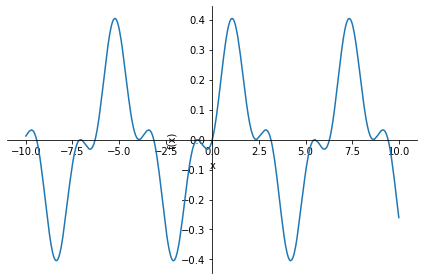

In [21]:
g_y = plot(y)


In [22]:
d = diff(y)
d


(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)

In [23]:
roots_d = solve(d)
roots_d = sorted(roots_d)
roots_d

[-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2),
 -pi/4,
 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2),
 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2),
 3*pi/4,
 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)]

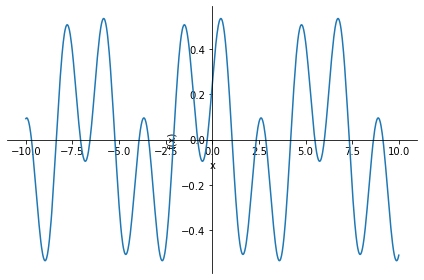

In [24]:
g_d = plot(d)

In [25]:
def make_intervals(roots):
    intervals = []
    for i in range(len(roots)-1):
        r = [roots[i], roots[i+1]]
        intervals.append(r)
    return intervals

## Вычислить вершины

In [26]:
print('Точки экстремума функции')
pprint(roots_d)

Точки экстремума функции
[-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2),
 -pi/4,
 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2),
 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2),
 3*pi/4,
 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)]


In [27]:
for i in roots_d:
    left_val = i-0.01 if i == 0 else i-0.01*abs(i)
    right_val = i+0.01 if i == 0 else i+0.01*abs(i)
    if d.evalf(subs={x: left_val}) < d.evalf(subs={x: i}) and d.evalf(subs={x: right_val}) > d.evalf(subs={x: i}):
        print(f'точка минимума ⋁ - "{i}"')
    else:
        print(f'точка максимума ⋀ - "{i}"')

точка минимума ⋁ - "-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)"
точка максимума ⋀ - "-pi/4"
точка минимума ⋁ - "2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)"
точка максимума ⋀ - "2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)"
точка минимума ⋁ - "3*pi/4"
точка максимума ⋀ - "2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)"


## Интервалы на которых функция возрастает/убывает

In [28]:
intervals = make_intervals(roots_d)
intervals.append([intervals[-1][1], intervals[0][0]+2*pi]) # Учитавыем периодичность

In [29]:
for i in intervals:
    if d.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'⮝ Функция возрастает на промежутке {i[0], i[1]}')
    else:
        print(f'⮟ Функция убывает на промежутке {i[0], i[1]}')

⮝ Функция возрастает на промежутке (-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2), -pi/4)
⮟ Функция убывает на промежутке (-pi/4, 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2))
⮝ Функция возрастает на промежутке (2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2), 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2))
⮟ Функция убывает на промежутке (2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2), 3*pi/4)
⮝ Функция возрастает на промежутке (3*pi/4, 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2))
⮟ Функция убывает на промежутке (2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2), -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2) + 2*pi)


## Область значений функции

In [30]:
func_values = []
for i in roots_d:
    func_values.append(y.evalf(subs={x:i}))
print([min(func_values), max(func_values)])

[-0.404106232073136, 0.404106232073136]


## Определить промежутки, на которых f(x) > 0 и f(x) < 0

In [31]:
intervals = make_intervals(roots_y)
intervals.append([intervals[-1][1], intervals[0][0]+2*pi]) # Учитавыем периодичность

In [32]:
for i in intervals:
    if y.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'f(x) > 0 на промежутке {i[0], i[1]}')
    else:
        print(f'f(x) < 0 на промежутке {i[0], i[1]}')

f(x) < 0 на промежутке (-pi/4, 0)
f(x) > 0 на промежутке (0, 3*pi/4)
f(x) > 0 на промежутке (3*pi/4, pi)
f(x) < 0 на промежутке (pi, 7*pi/4)
